In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns

In [207]:
#Importation du donner brute
data = pd.read_csv("datasets/BBCA.JK new.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,5200.0,5200.0,5200.0,5200.0,47.365.439.453.125,0
1,2019-01-02,5200.0,5245.0,5200.0,5240.0,477.297.900.390.625,35956000
2,2019-01-03,5200.0,5220.0,5115.0,5180.0,471.832.666.015.625,72358000
3,2019-01-04,5175.0,5205.0,5125.0,5205.0,474.109.765.625,51465000
4,2019-01-07,5265.0,5325.0,5245.0,5245.0,4.777.533.203.125,73438000
...,...,...,...,...,...,...,...
1246,2024-01-22,9600.0,9650.0,9525.0,9625.0,9625.0,52868300
1247,2024-01-23,9450.0,9600.0,9450.0,9600.0,9600.0,92348600
1248,2024-01-24,9600.0,9600.0,9475.0,9525.0,9525.0,84906000
1249,2024-01-25,9450.0,9575.0,9450.0,9500.0,9500.0,63212700


In [208]:
# il y a deux close donc j'ai preferer supprimer celui ci
data = data.drop("Adj Close",axis=1)


In [209]:
""" Il y a plusieur donner avant et de commencer le EDA il vaut mieux regrouper le donner par mois et semaine"""
data["Date"] = pd.to_datetime(data["Date"])
data_month = data.groupby(data["Date"].dt.to_period("M")).sum().reset_index()
data_week = data.resample("W-Mon",on="Date").sum().reset_index()


In [210]:
                                                    """ EDA de data mensuel """
""" Analyse de de form: -la target est le Close
                        - il y a 61 ligne et 6 colonne
                        - il y a  5 float et 1 datetime

"""
print(data_month.dtypes)
print(data_month.shape)
print(data_month.isnull().sum())


Date      period[M]
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
dtype: object
(61, 6)
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


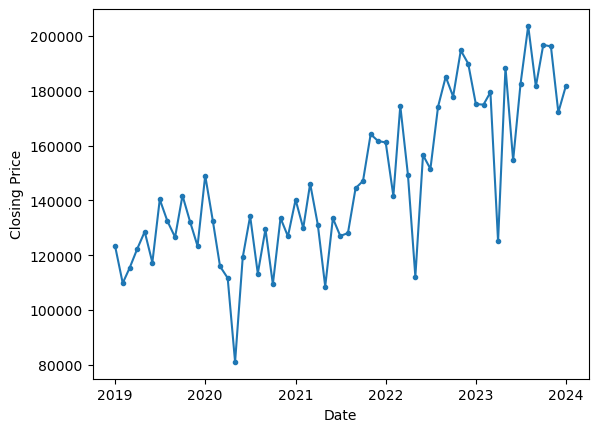

In [211]:
""" Analyse de fond:
                     - open : represent l'ouverture des prix
                     - High : represent le hausse des prix
                     - Low : represent la valeur le plus faible
                     - volume : les transaction faite
on remarque que ces variable sont un peu semblage donc on peut en tirer le meilleur histogramme en representant la date et le close



"""
data_month['Date'] = data_month['Date'].dt.to_timestamp()
plt.plot(data_month["Date"],data_month["Close"],marker=".")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [184]:
""" ce sont les valeur anner et mois ainsi que les valeur correler 
on peut en deduire que tous les carateristique sont correler au Close sauf month et le volume
"""
data_month["Year"] = data_month["Date"].dt.year
data_month["month"] = data_month["Date"].dt.month
data_month.corr()["Close"]

Open      0.999876
High      0.999717
Low       0.999874
Close     1.000000
Volume   -0.040827
Year      0.747379
month     0.205476
Name: Close, dtype: float64

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [186]:
                                    """Preprocessing"""
""" on separer les donner en deux categories train et test qui est 80% pour le train et 20% pour le test"""
train_set,test_set = train_test_split(data_month,test_size = 0.2,random_state=0)


In [212]:
def preprocessing(data_month):
    y = data_month["Close"]
    x = data_month.drop(["Date","Close"],axis=1)
    return x,y


In [187]:
x_train,y_train = preprocessing(train_set)
x_test,y_test = preprocessing(test_set)

In [193]:
                                        """Model"""
model = make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42))


In [196]:
def evaluation(model):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    print(model.score(x_test,y_test))
    
    err = np.abs(y_test-y_predict)
    
    mse = mean_squared_error(y_test, y_predict)
    print("Mean Squared Error:", mse)
    
    # Utiliser R^2 pour évaluer la performance
    r2 = r2_score(y_test, y_predict)
    print("R^2 Score:", r2)
    mse = mean_squared_error(y_test, y_predict)
    print("Mean Squared Error (MSE):", mse)

    # Calculer l'erreur absolue moyenne (MAE)
    mae = mean_absolute_error(y_test, y_predict)
    print("Mean Absolute Error (MAE):", mae)
    plt.hist(err,bins=50)

0.9947192855195051
Mean Squared Error: 2808019.0000970056
R^2 Score: 0.9947192855195051
Mean Squared Error (MSE): 2808019.0000970056
Mean Absolute Error (MAE): 1230.6347004800862


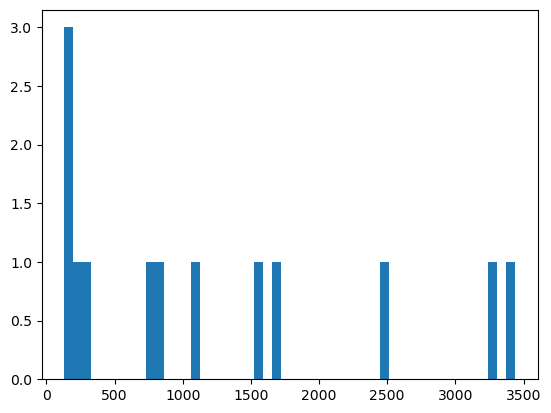

In [197]:
#ici on peut conclure que notre model peut predir 0.99 
evaluation(model)